<a href="https://colab.research.google.com/github/Dashnyam7/scikit-learn/blob/main/Evalution_of_predicted_probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evalution of predicted probability

## ROC curve and AUC

There is an evaluation method that uses an ROC curve to quantitatively judge the accuracy of the probability of a certain event occurring when the model predicts it

By obtaining an index called AUC
from this ROC curve , it is possible to quantitatively judge the accuracy of the prediction probability

In [1]:
import pandas as pd
import numpy as np
df = pd.DataFrame({"Predicted purchase probability": np.array([0.99, 0.97, 0.91, 0.88, 0.82, 0.81, 0.79, 0.74, 0.65, 0.6, 0.53, 0.50, 0.41, 0.39, 0.33, 0.3, 0.25, 0.21, 0.18, 0.17]),
                    "achievement": np.array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0]),
                    "true positive rate": np.array([1, 1, 2, 2, 3, 3, 3, 4, 5, 5, 6, 7, 8, 8, 9, 9, 10, 11, 12, 12])/12,
                    "false positive rate": np.array([0, 1, 1, 2, 2, 3, 4, 4, 4, 5, 5, 5, 5, 6, 6, 7, 7, 7, 7, 8])/8})
df

,Predicted purchase probability,achievement,true positive rate,false positive rate
0,0.99,1,0.083333,0.000
1,0.97,0,0.083333,0.125
2,0.91,1,0.166667,0.125
3,0.88,0,0.166667,0.250
4,0.82,1,0.250000,0.250
5,0.81,0,0.250000,0.375
6,0.79,0,0.250000,0.500
7,0.74,1,0.333333,0.500
8,0.65,1,0.416667,0.500
9,0.60,0,0.416667,0.625


"Achievement" 1means "purchased the product 0" and "Did not purchase the product", the result is that 12 people purchased and 8 people did not purchase.

In drawing the ROC curve, the true positive rate and false positive rate are important values.
Expressing the true positive rate and the false positive rate as fractions is as follows

## Plot ROC curve

Now let's actually plot the ROC curve using our dataset.
First, assign the true positive rate and false positive rate data to variables. Also, add to the beginning of each data so that

In [7]:
tp_data = df.loc[:, "true positive rate"].values
fp_data = df.loc[:, "false positive rate"].values
fp_data = np.append(0, fp_data)
tp_data = np.append(0, tp_data)
print(tp_data)
print(fp_data)

[0.         0.08333333 0.08333333 0.16666667 0.16666667 0.25
 0.25       0.25       0.33333333 0.41666667 0.41666667 0.5
 0.58333333 0.66666667 0.66666667 0.75       0.75       0.83333333
 0.91666667 1.         1.        ]
[0.    0.    0.125 0.125 0.25  0.25  0.375 0.5   0.5   0.5   0.625 0.625
 0.625 0.625 0.75  0.75  0.875 0.875 0.875 0.875 1.   ]


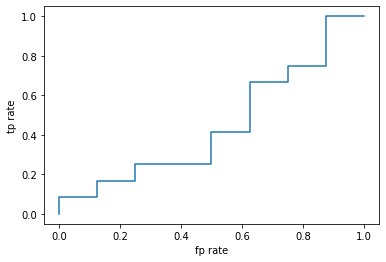

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.step(fp_data, tp_data)
ax.set_xlabel('fp rate')
ax.set_ylabel('tp rate')
plt.show()

## Find AUC

Now let's find the AUC from the ROC curve we plotted earlier.

$AUC = \frac{1}{12}\times\frac{1}{8}+\frac{2}{12}\times\frac{1}{8}+\frac{3}{12}\times\frac{2}{8}+\frac{5}{12}\times\frac{1}{8}+\frac{8}{12}\times\frac{1}{8}+\frac{9}{12}\times\frac{1}{8}+\frac{12}{12}\times\frac{1}{8}=0.4479166666666667$

##  Using functions

In [9]:
from sklearn.metrics import roc_curve
target_data = df.loc[:, "achievement"].values
pred_rate = df.loc[:, "Predicted purchase probability"].values
fp_rate, tp_rate, threshold = roc_curve(target_data, pred_rate)
print('true positive rate： ', tp_rate)
print('false positive rate： ', fp_rate)

true positive rate：  [0.         0.08333333 0.08333333 0.16666667 0.16666667 0.25
 0.25       0.41666667 0.41666667 0.66666667 0.66666667 0.75
 0.75       1.         1.        ]
false positive rate：  [0.    0.    0.125 0.125 0.25  0.25  0.5   0.5   0.625 0.625 0.75  0.75
 0.875 0.875 1.   ]


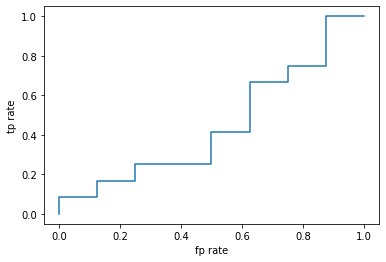

In [10]:
fig, ax = plt.subplots()
ax.step(fp_rate, tp_rate)
ax.set_xlabel('fp rate')
ax.set_ylabel('tp rate')
plt.show()

In [11]:
from sklearn.metrics import roc_auc_score
roc_auc_score(target_data, pred_rate)

0.4479166666666667